# Microsoft Stock Price Data Analytics 

### Introduction

task for Ruiz

In [32]:
#import libraries first
import duckdb 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from dotenv import load_dotenv
import os

### ETL Process

task for Ruiz 

In [33]:
# Set your MotherDuck token

load_dotenv('.env')

token = os.getenv('motherduck_token')

In [34]:

# Connect to the database
con = duckdb.connect(f"md:?motherduck_token={token}")

# Define your SQL query
sql_query = "SELECT * FROM stocks_clouddb.msft_data"

# Execute the query and fetch the result into a DataFrame
df = con.sql("SELECT * FROM stocks_clouddb.msft_data").fetchdf().copy()

In [20]:
# Define your SQL query
sql_query = "SELECT * FROM stocks_clouddb.msft_data"
sql_query

'SELECT * FROM stocks_clouddb.msft_data'

In [21]:
# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(df.head())

First few rows of the dataset:
             datetime  open_price  day_high   day_low  close_price  \
0 1986-03-12 21:00:00    0.055004  0.063093  0.055004     0.060396   
1 1986-03-13 21:00:00    0.060396  0.063632  0.060396     0.062553   
2 1986-03-16 21:00:00    0.062553  0.064172  0.062553     0.063632   
3 1986-03-17 21:00:00    0.063632  0.064172  0.061475     0.062014   
4 1986-03-18 21:00:00    0.062014  0.062553  0.060396     0.060936   

       volume  dividends  stock_splits  
0  1031788800        0.0           0.0  
1   308160000        0.0           0.0  
2   133171200        0.0           0.0  
3    67766400        0.0           0.0  
4    47894400        0.0           0.0  


In [22]:
# Get a summary of the dataset
print("Dataset summary:")
print(df.info())


Dataset summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12470 entries, 0 to 12469
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   datetime      12470 non-null  datetime64[us]
 1   open_price    12470 non-null  float64       
 2   day_high      12470 non-null  float64       
 3   day_low       12470 non-null  float64       
 4   close_price   12470 non-null  float64       
 5   volume        12470 non-null  int32         
 6   dividends     12470 non-null  float64       
 7   stock_splits  12470 non-null  float32       
dtypes: datetime64[us](1), float32(1), float64(5), int32(1)
memory usage: 682.1 KB
None


In [23]:
# Summary statistics for numerical columns
print("Summary statistics for numerical columns:")
print(df.describe())


Summary statistics for numerical columns:
                         datetime    open_price      day_high       day_low  \
count                       12470  12470.000000  12470.000000  12470.000000   
mean   2009-03-31 15:00:04.907778    103.955466    104.516040    103.398609   
min           1986-03-12 21:00:00      0.055004      0.057161      0.055004   
25%           1998-07-13 03:00:00     13.649901     13.970221     13.419949   
50%           2010-11-30 09:00:00     23.567357     23.736341     23.338134   
75%           2021-12-29 09:15:00    244.250000    245.380001    243.259995   
max           2023-10-09 12:30:00    364.179993    366.779999    362.820007   
std                           NaN    124.010181    124.490328    123.538532   

        close_price        volume     dividends  stock_splits  
count  12470.000000  1.247000e+04  12470.000000  12470.000000  
mean     103.967006  4.344936e+07      0.002132      0.001363  
min        0.056083  7.888970e+05      0.000000      0

In [24]:
# Check for missing values
print("Missing values:")
print(df.isnull().sum())



Missing values:
datetime        0
open_price      0
day_high        0
day_low         0
close_price     0
volume          0
dividends       0
stock_splits    0
dtype: int64


In [25]:
# Check for duplicate rows
print("Duplicate rows:")
print(df.duplicated().sum())

Duplicate rows:
0


In [26]:
# Step 1: Extract the "close_price" column
close_price_data = df['close_price']

#### Data Visualization

In the following section, we've created different plots to understand Microsoft stock price changed over time before developing the ML model to predict the stock price. We'll be answering the following questions below while doing exploratory analysis: 

1. What is the statistical distribution of Microsoft's stock price over the given time period?
2. How has Microsoft's stock price changed over the observed time frame?
3. What is the annual trend in Microsoft's stock price, and how has it evolved over the years?
4. What is the daily volatility of Microsoft's stock price?
5. What is the degree of correlation between Microsoft's stock price and other relevant variables?

#### Stock Price Distribution

In this analysis, we generated a histogram with a kernel density estimate (KDE) overlay to examine the distribution of Microsoft's closing stock prices. The resulting chart reveals a positively skewed distribution, where the majority of data points are concentrated on the left side, while the right tail exhibits a long tail extending to higher values. This distribution provides insights into the typical range of closing stock prices and the presence of potential outliers or extreme values. The visualization aids in understanding the underlying statistical characteristics of the dataset, which is crucial for modeling and risk assessment in financial analysis.

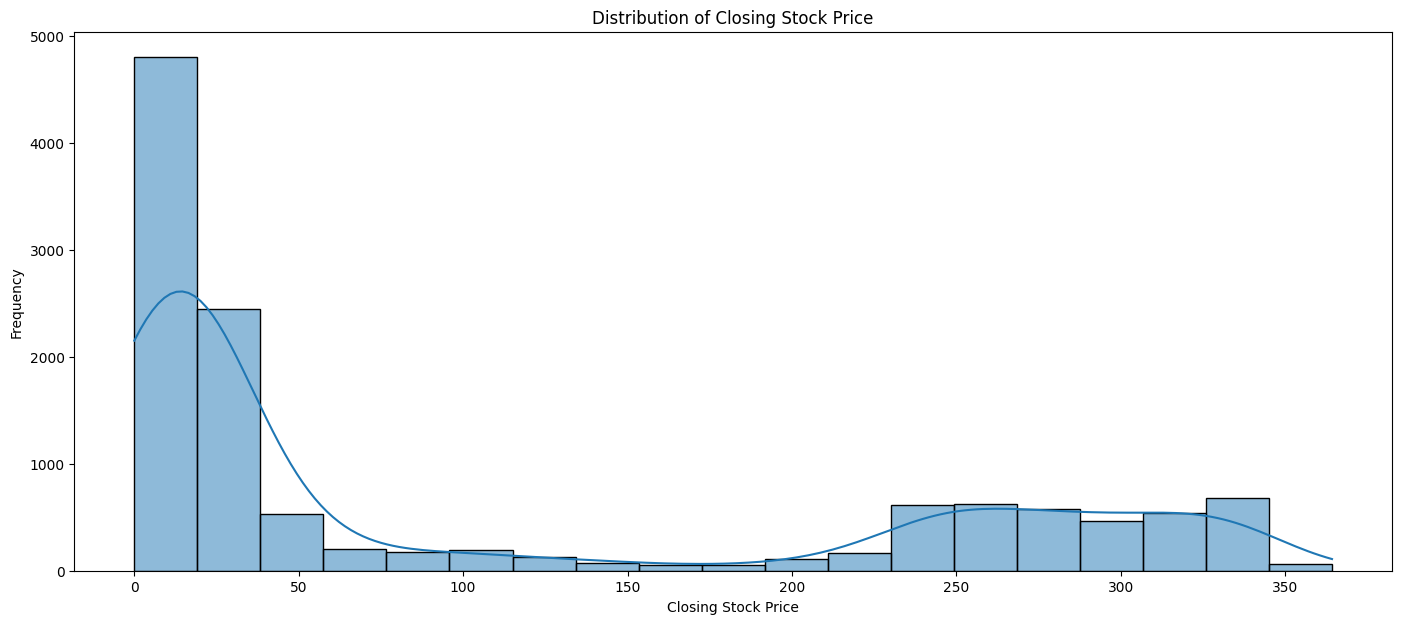

In [27]:
plt.figure(figsize = (17,7))
sns.histplot(df['close_price'],kde=True)
plt.title('Distribution of Closing Stock Price')
plt.xlabel('Closing Stock Price')
plt.ylabel('Frequency')
plt.show()

#### Stock Price Changes Over Time

This line chart tracks the historical closing stock prices of Microsoft over the past 35 years. The chart illustrates a period of relative price stability between 2000 and 2015, with the stock trading around the $50 mark. However, a significant upward trend emerged after 2015, leading to a remarkable surge in Microsoft's stock value, reaching nearly $350 by 2020. Subsequently, there was a noticeable decline to around $200 in 2022, followed by a swift rebound, surpassing the previous peak and exceeding $350 in 2023. This chart provides valuable insights into the stock's historical performance, indicating substantial growth potential and noteworthy price fluctuations.

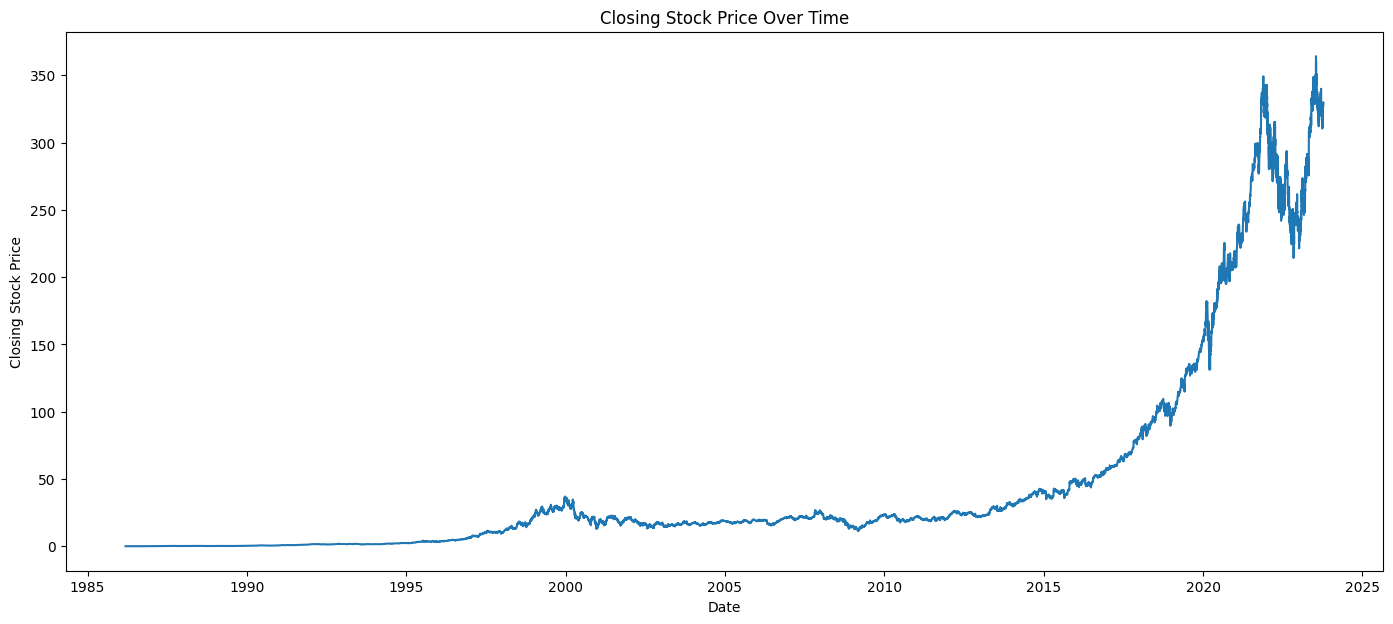

In [28]:
#line chart of closing stock price over time 

plt.figure(figsize=(17,7))
sns.lineplot(x='datetime', y = 'close_price', data = df)
plt.title('Closing Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Stock Price')
plt.show()

#### Stock Price Changes by Year

This box plot provides a visual representation of Microsoft's closing stock prices distributed across multiple years. The plot reveals a general trend of increasing stock prices over the years, underscoring the stock's growth potential. Additionally, there are a few notable outliers, which may represent exceptional price movements or events that warrant further investigation. The visualization effectively summarizes the annual variations in stock prices and highlights the overall positive trajectory, making it a valuable tool for investors and analysts assessing Microsoft's historical performance.

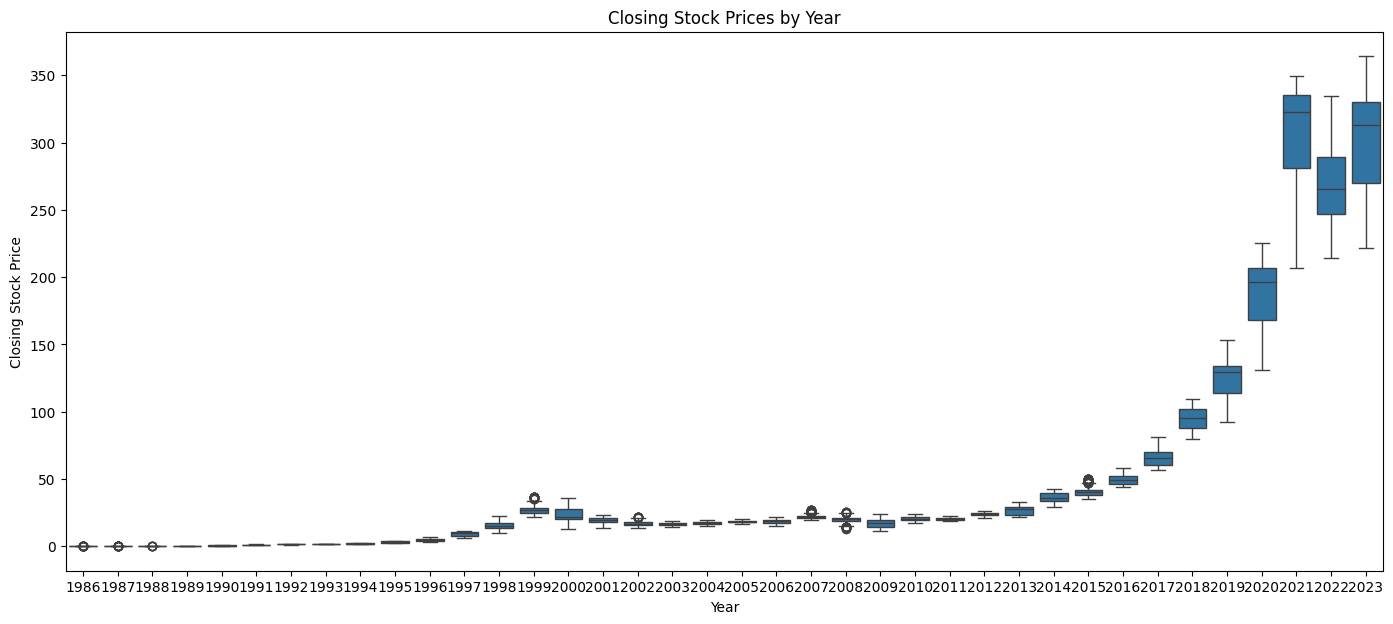

In [29]:
df['year'] = df['datetime'].dt.year
plt.figure(figsize=(17,7))
sns.boxplot(x='year', y='close_price', data=df)
plt.title('Closing Stock Prices by Year')
plt.xlabel('Year')
plt.ylabel('Closing Stock Price')
plt.show()

#### Daily Return Analysis 

To gain a deeper understanding of Microsoft's historical stock performance, we have examined the daily percentage changes in stock prices. This line chart illustrates the daily fluctuations in Microsoft's stock returns over time. Notably, it showcases instances of sudden drops in stock value, often followed by rapid rebounds. Over the last 2,000 days, the stock has demonstrated relative stability in its daily returns, with periodic fluctuations. This analysis of daily returns offers a finer perspective on the stock's volatility and resilience, which is vital for short-term trading strategies and risk assessment.

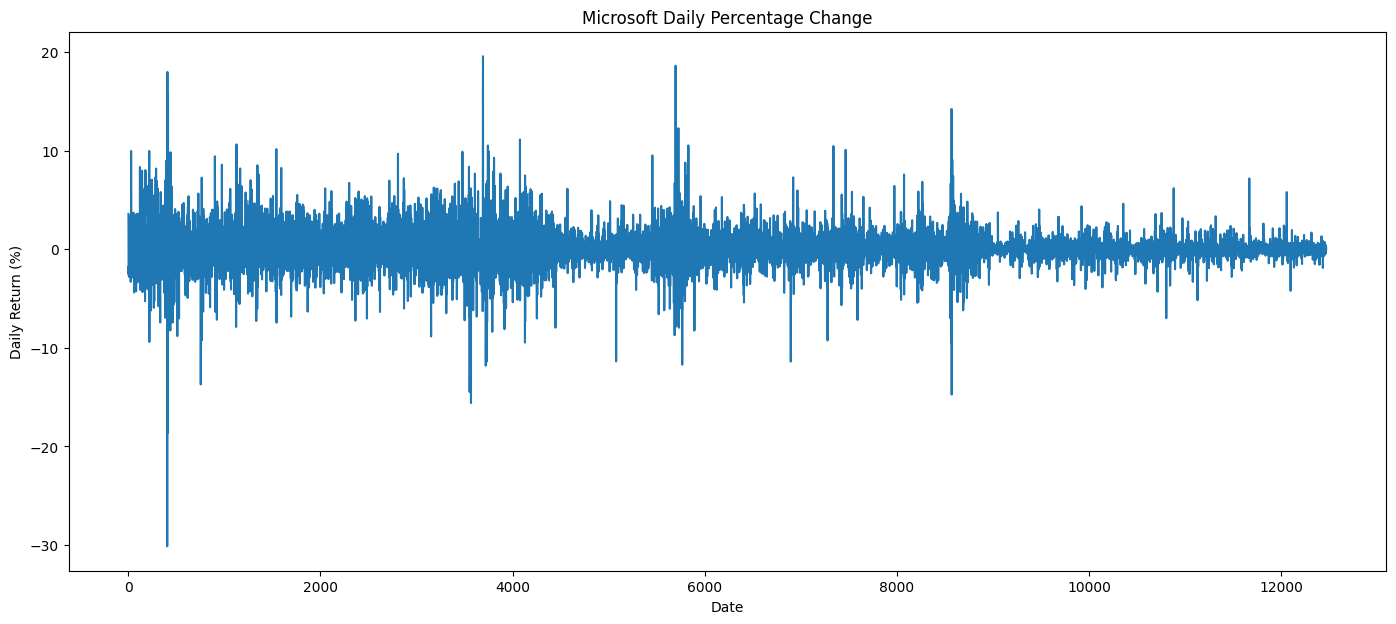

In [30]:
#use pct_change to find the percent change for each day. 

daily_returns = df['close_price'].pct_change()*100

plt.figure(figsize =(17,7))

#plot the daily return percentage 
plt.plot(daily_returns.index, daily_returns.values)
plt.title('Microsoft Daily Percentage Change')
plt.xlabel('Date')
plt.ylabel('Daily Return (%)') 
plt.show()

#### Correlations with Stock Price

In this analysis, we've constructed a correlation heatmap to explore the relationships between various stock price-related variables, including the opening price, highest price of the day, lowest price of the day, and closing price. The heatmap visualizes the strength and direction of these correlations. It is evident that the opening and closing prices exhibit a robust positive correlation, while the low and high prices demonstrate a relatively weaker positive correlation. This information is valuable for understanding how different aspects of stock pricing are interrelated, aiding in risk management and investment decision-making.

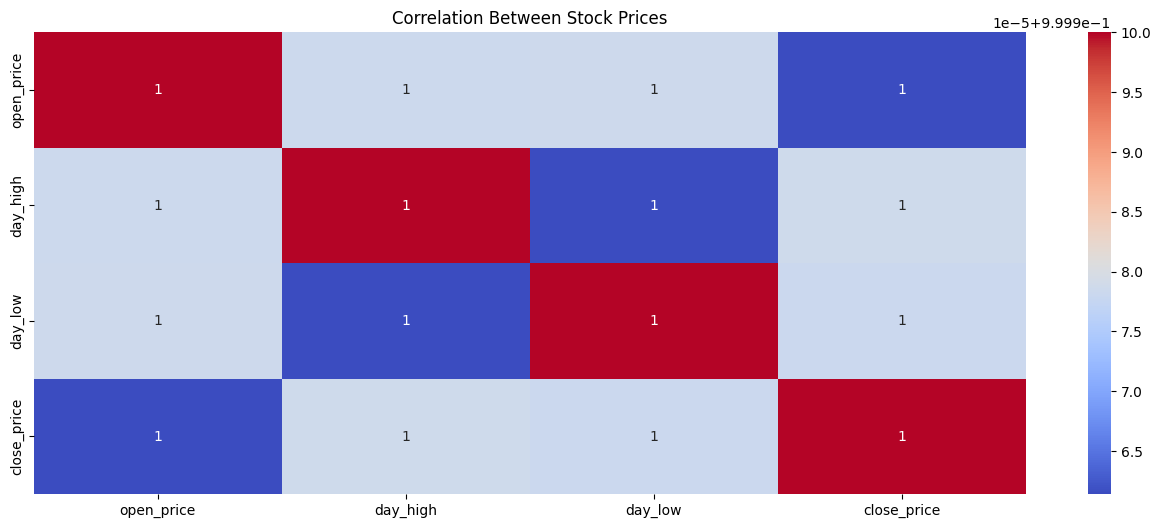

In [31]:
#create a heatmap of the correlation between stock prices 

corr = df[['open_price','day_high','day_low','close_price']].corr()
plt.figure(figsize=(16,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Between Stock Prices')
plt.show()
#it shows the opening and closing prices have a strong positive correlation, while the low and high prices have a weaker positive correlation. 

#### Conclusion

The EDA process commenced with data retrieval from Yahoo Finance, storing it in the 'MotherDuck' repository, and establishing a pipeline to ensure regular data updates every Friday. Data cleaning procedures were applied to ensure data integrity and consistency by formatting and eliminating duplicate values.

In addition, we conducted exploratory data analysis by creating different visualizations, including line plots, box plots, histograms, and heatmaps, were employed to extract valuable insights from the dataset. These visualizations unveiled latent trends, patterns, and relationships that may not have been readily discernible from the raw data.

In summation, the visualizations collectively portray Microsoft's stock as having exhibited sustained growth over time, interspersed with periods of volatility. This data-driven analysis lays the foundation for our ongoing efforts, including predictive modeling, enabling us to make well-informed financial decisions and investments.
